<h1>MNIST digits classification using ConvNet</h1>


<h2>Loading the data set</h2>

In [1]:
from keras.datasets import mnist

Using TensorFlow backend.


In [2]:
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

In [3]:
train_images.shape

(60000, 28, 28)

In [4]:
test_images.shape

(10000, 28, 28)

In [5]:
test_labels

array([7, 2, 1, ..., 4, 5, 6], dtype=uint8)

<h2>Visualising the dataset</h2>

In [6]:
import matplotlib.pyplot as plt

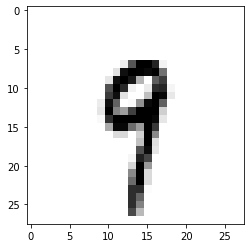

9

In [7]:
digit = train_images[600]
plt.imshow(digit, cmap=plt.cm.binary)
plt.show()
train_labels[600]

<h2>Instantiating a Convnet</h2>

In [8]:
from keras import layers
from keras import models

In [9]:
model = models.Sequential()

In [10]:
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))

Instructions for updating:
If using Keras pass *_constraint arguments to layers.


In [11]:
model.add(layers.MaxPooling2D((2, 2)))

In [12]:
model.add(layers.Conv2D(64, (3, 3), activation='relu'))

In [13]:
model.add(layers.MaxPooling2D((2, 2)))

In [14]:
model.add(layers.Conv2D(64, (3, 3), activation='relu'))

<h2>What the Convnet does?</h2>

<blockquote>A <b>convnet</b> takes as input tensors of shape (image_height, image_width, image_channels) (not including the batch dimension).</blockquote>

<h3>Let us have a look at the model architecture</h3>

In [15]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 3, 3, 64)          36928     
Total params: 55,744
Trainable params: 55,744
Non-trainable params: 0
_________________________________________________________________


<blockquote>We can see that the output of every Conv2D and MaxPooling2D layer is a 3D tensor of shape (height, width, channels) . The width and height dimensions tend to shrink as we go deeper in the network. The number of channels is controlled by the first argument passed to the Conv2D layers (32 or 64).
    <br>
The next step is to feed the last output tensor (of shape (3, 3, 64) ) into a densely connected classifier network like those you’re already familiar with: a stack of Dense layers. These classifiers process vectors, which are 1D , whereas the current output is a 3D tensor. First we have to flatten the 3D outputs to 1D , and then add a few Dense layers on top.
</blockquote>

<h2>Adding a Classifier on the top of the Convnet</h2>

In [16]:
model.add(layers.Flatten())

In [17]:
model.add(layers.Dense(64, activation='relu'))

In [18]:
model.add(layers.Dense(10, activation='softmax'))

<h3>Let us have a look at the final model</h3>

In [19]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 3, 3, 64)          36928     
_________________________________________________________________
flatten_1 (Flatten)          (None, 576)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 64)               

<h2>Preparing the image data</h2>

<blockquote>Before training, we will preprocess the data by reshaping it into the shape network expects and scaling it so that all values are in the [0, 1] interval.</blockquote>

In [20]:
train_images = train_images.reshape((60000, 28, 28, 1))
train_images = train_images.astype('float32') / 255
test_images = test_images.reshape((10000, 28, 28, 1))
test_images = test_images.astype('float32') / 255

<h2>Preparing the labels</h2>

In [21]:
from keras.utils import to_categorical

In [22]:
train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

<h2>Compiling the model</h2>

In [23]:
model.compile(optimizer='rmsprop',
            loss='categorical_crossentropy',
            metrics=['accuracy'])

<h2>Training the Convnet on MNIST images</h2>

In [24]:
model.fit(train_images, train_labels, epochs=5, batch_size=64)


Epoch 1/5
60000/60000 [==============================] - 22s 371us/step - loss: 0.1644 - accuracy: 0.9479
Epoch 2/5
60000/60000 [==============================] - 22s 369us/step - loss: 0.0466 - accuracy: 0.9859
Epoch 3/5
60000/60000 [==============================] - 22s 360us/step - loss: 0.0317 - accuracy: 0.9904
Epoch 4/5
60000/60000 [==============================] - 21s 352us/step - loss: 0.0240 - accuracy: 0.9925
Epoch 5/5
60000/60000 [==============================] - 21s 354us/step - loss: 0.0193 - accuracy: 0.9941


<h2>Understanding the Convolution Operation</h2>

<blockquote>The fundamental difference between a densely connected layer and a convolution layer is this: Dense layers learn global patterns in their input feature space (for example, for a MNIST digit, patterns involving all pixels), whereas convolution layers learn local patterns in the case of images, patterns found in small 2D windows of the inputs. In above example all windows were 3X3.</blockquote>

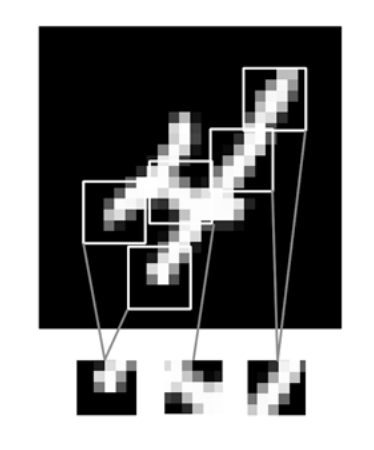

<blockquote>Images can be broken into local patterns such as edges, textures, and so on.</blockquote>

<h3>Lessons Learnt</h3>
<blockquote>The characteristic, that convolutional layers learn local patterns, gives convnets two interesting properties.
    <ul>
        <li>The patterns they learn are <i>translation invariant</i>. After learning a certain pattern in the lower-right corner of a picture, a convnet can recognize it anywhere: for example, in the upper-left corner. A densely connected network would have to learn the pattern anew if it appeared at a new location. This makes convnets data efficient when processing images (because <i>the visual world is fundamentally translation invariant</i>): they need fewer training samples to learn representations that have generalization power.
        </li>
        <li>
            They can learn spatial hierarchies of patterns. A first convolution layer will learn small local patterns such as edges, a second convolution layer will learn larger patterns made of the features of the first layers, and so on. This allows convnets to efficiently learn increasingly complex and abstract visual concepts (because the visual world is <i>fundamentally spatially hierarchical</i>).
        </li>
    </ul>
</blockquote>

<h4>What is spatial hierarchy?</h4>

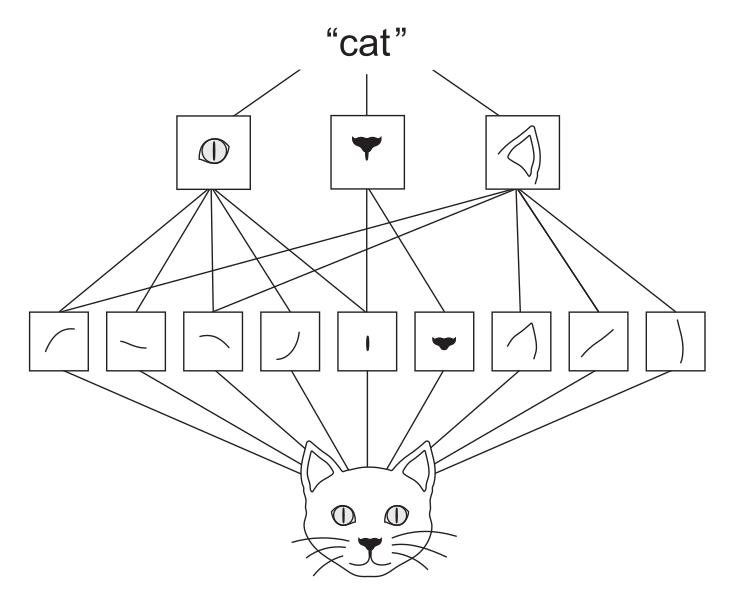

<blockquote>
    The visual world forms a spatial hierarchy of visual modules: hyperlocal edges combine into local objects such as eyes or ears, which combine into high-level concepts such as “cat”.
</blockquote>    

<h2>Accuracy and Loss of trained model</h2>

In [25]:
test_loss, test_acc = model.evaluate(test_images, test_labels)
print('Test Accuracy:', test_acc)
print('Test Loss:', test_loss)

10000/10000 [==============================] - 3s 302us/step
Test Accuracy: 0.9909999966621399
Test Loss: 0.03079216769630475


<h2>Prediction on the test images</h2>

In [26]:
predictions = model.predict_classes(test_images)

<h2>Visualising the second test image</h2>

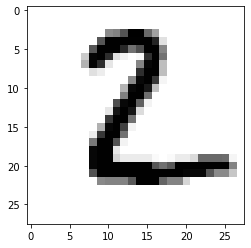

In [27]:
digit = test_images[1].reshape((28,28))
plt.imshow(digit, cmap=plt.cm.binary)
plt.show()

<h2>Prediction on second test image</h2>

In [29]:
predictions[1]

2